# Análisis Exploratorio de Datos (EDA)
## Classification Project: Predicting Default Risk in Commercial Loans

**Objetivo:** Construir un modelo de clasificación multiclase para predecir el nivel de riesgo de impago de clientes que solicitan un préstamo comercial.

**Clases objetivo:**
- 0: Bajo riesgo
- 1: Riesgo medio  
- 2: Alto riesgo

**Dataset:** 20,000 instancias con 35 características divididas en:
- Información Financiera (15 features)
- Historial de Pagos (10 features)
- Datos Demográficos y Comportamiento (10 features)

## 1. Setup y Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Configurar paths
sys.path.append('../src')

# Configurar matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

# Importar funciones personalizadas
from data.loader import (
    load_training_data, 
    load_test_data, 
    get_feature_info, 
    separate_features_target,
    encode_target_labels,
    check_missing_values
)

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [2]:
# Cargar datos de entrenamiento y prueba
train_data = load_training_data('../data/raw/datos_entrenamiento_riesgo.csv')
test_data = load_test_data('../data/raw/datos_prueba_riesgo.csv')

print(f"Datos de entrenamiento: {train_data.shape}")
print(f"Datos de prueba: {test_data.shape}")

# Mostrar información básica
print("\n--- Información del Dataset de Entrenamiento ---")
print(train_data.info())

print("\n--- Primeras 5 filas ---")
display(train_data.head())

Datos de entrenamiento: (20000, 35)
Datos de prueba: (5000, 35)

--- Información del Dataset de Entrenamiento ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   deuda_total                         20000 non-null  float64
 1   proporcion_ingreso_deuda            20000 non-null  float64
 2   monto_solicitado                    20000 non-null  float64
 3   tasa_interes                        20000 non-null  float64
 4   lineas_credito_abiertas             19795 non-null  float64
 5   saldo_promedio_bancario             20000 non-null  float64
 6   ingresos_familiares_per_capita      20000 non-null  float64
 7   puntuacion_credito_bureau           20000 non-null  float64
 8   antiguedad_laboral_meses            20000 non-null  int64  
 9   patrimonio_neto                     20000 non-null  float

,deuda_total,proporcion_ingreso_deuda,monto_solicitado,tasa_interes,lineas_credito_abiertas,saldo_promedio_bancario,ingresos_familiares_per_capita,puntuacion_credito_bureau,antiguedad_laboral_meses,patrimonio_neto,...,nivel_educativo,estado_civil,numero_dependientes,propiedad_vivienda,tipo_vivienda,residencia_antiguedad_meses,sector_laboral,numero_empleos_ultimos_5_anos,frecuencia_transacciones_mensuales,nivel_riesgo
0,264963.261472,2.558188,224689.970169,412718.904936,1.0,617000.655828,784371.839561,431.472686,63,579054.186683,...,1.0,0.0,4,1,0.0,3.0,5.0,0,184,Medio
1,11489.554688,4.068588,340775.397601,134594.323820,3.0,615109.565461,612019.770231,769.709848,132,979346.226262,...,5.0,1.0,1,3,5.0,5.0,2.0,1,33,Bajo
2,723302.929780,4.822340,339093.283806,366302.670205,6.0,290722.132266,450139.718347,603.495294,430,96494.531775,...,3.0,0.0,1,2,3.0,3.0,1.0,1,293,Alto
3,860369.349430,3.916943,376398.086975,682877.468407,2.0,278509.345990,938593.353343,622.461619,320,136862.479683,...,3.0,1.0,5,3,3.0,2.0,2.0,5,482,Alto
4,165656.532005,2.662927,532351.607061,370399.546017,1.0,799624.680649,474263.676188,841.087629,398,748688.607413,...,5.0,3.0,0,0,4.0,0.0,4.0,4,713,Bajo


## 2. Análisis de la Variable Objetivo

Distribución de clases:
Bajo:  5,968 (29.8%)
Medio: 11,017 (55.1%)
Alto:  3,015 (15.1%)


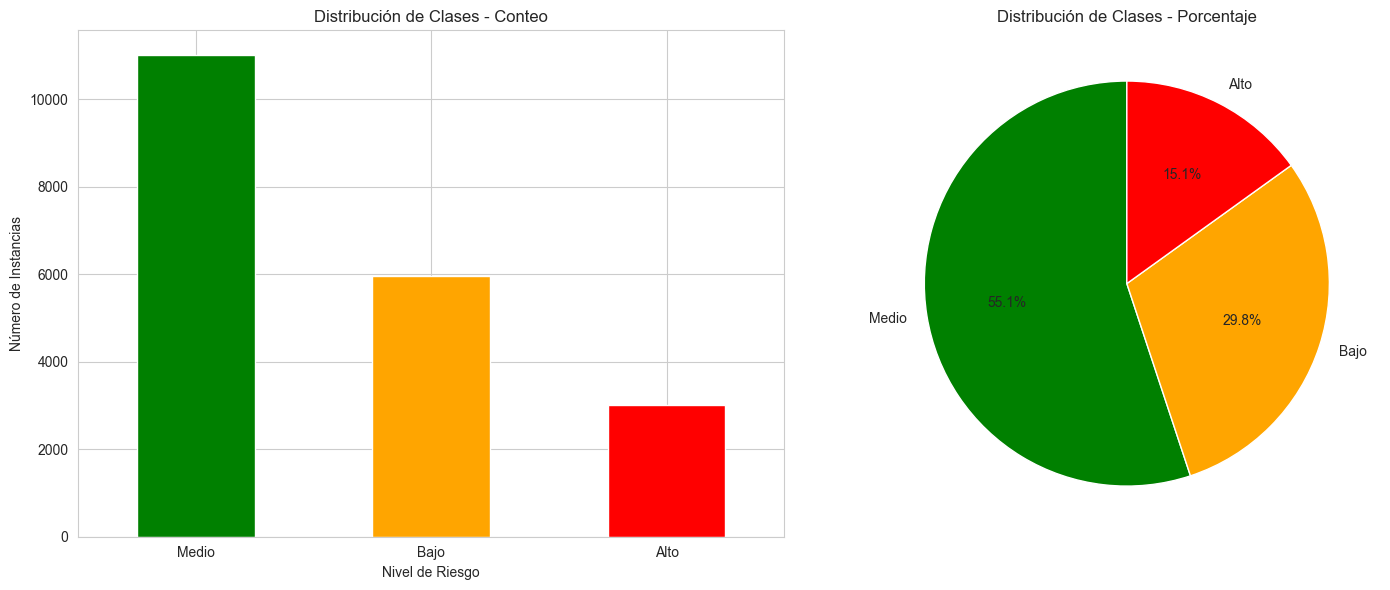


Ratio de desbalance:
Clase mayoritaria / Clase minoritaria: 3.65


In [3]:
# Análisis de distribución de clases
target_counts = train_data['nivel_riesgo'].value_counts()
target_percentages = train_data['nivel_riesgo'].value_counts(normalize=True) * 100

print("Distribución de clases:")
print(f"Bajo:  {target_counts['Bajo']:,} ({target_percentages['Bajo']:.1f}%)")
print(f"Medio: {target_counts['Medio']:,} ({target_percentages['Medio']:.1f}%)")
print(f"Alto:  {target_counts['Alto']:,} ({target_percentages['Alto']:.1f}%)")

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
target_counts.plot(kind='bar', ax=ax1, color=['green', 'orange', 'red'])
ax1.set_title('Distribución de Clases - Conteo')
ax1.set_xlabel('Nivel de Riesgo')
ax1.set_ylabel('Número de Instancias')
ax1.tick_params(axis='x', rotation=0)

# Gráfico de pastel
ax2.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
        colors=['green', 'orange', 'red'], startangle=90)
ax2.set_title('Distribución de Clases - Porcentaje')

plt.tight_layout()
plt.show()

# Verificar balance de clases
print(f"\nRatio de desbalance:")
print(f"Clase mayoritaria / Clase minoritaria: {target_counts.max() / target_counts.min():.2f}")

## 3. Análisis de Valores Faltantes

In [4]:
# Verificar valores faltantes
missing_train = check_missing_values(train_data)
missing_test = check_missing_values(test_data)

print("Valores faltantes en datos de entrenamiento:")
if len(missing_train) > 0:
    display(missing_train)
else:
    print("No hay valores faltantes en el dataset de entrenamiento")

print("\nValores faltantes en datos de prueba:")
if len(missing_test) > 0:
    display(missing_test)
else:
    print("No hay valores faltantes en el dataset de prueba")

# Verificar tipos de datos
print("\nTipos de datos:")
print(train_data.dtypes.value_counts())

# Identificar features categóricas y numéricas
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

if 'nivel_riesgo' in categorical_features:
    categorical_features.remove('nivel_riesgo')
if 'nivel_riesgo' in numerical_features:
    numerical_features.remove('nivel_riesgo')

print(f"\nFeatures categóricas ({len(categorical_features)}): {categorical_features}")
print(f"Features numéricas ({len(numerical_features)}): {len(numerical_features)} features")

Valores faltantes en datos de entrenamiento:


,Column,Missing_Count,Missing_Percentage
16,porcentaje_utilizacion_credito,927,4.635
31,sector_laboral,834,4.170
21,proporcion_pagos_a_tiempo,421,2.105
29,tipo_vivienda,349,1.745
30,residencia_antiguedad_meses,335,1.675
25,nivel_educativo,307,1.535
26,estado_civil,262,1.310
4,lineas_credito_abiertas,205,1.025



Valores faltantes en datos de prueba:


,Column,Missing_Count,Missing_Percentage
31,sector_laboral,230,4.60
16,porcentaje_utilizacion_credito,218,4.36
4,lineas_credito_abiertas,200,4.00
21,proporcion_pagos_a_tiempo,99,1.98
25,nivel_educativo,99,1.98
29,tipo_vivienda,96,1.92
30,residencia_antiguedad_meses,86,1.72
26,estado_civil,80,1.60



Tipos de datos:
float64    19
int64      15
object      1
Name: count, dtype: int64

Features categóricas (0): []
Features numéricas (34): 34 features


## 4. Estadísticas Descriptivas

In [5]:
# Estadísticas descriptivas para features numéricas
print("Estadísticas descriptivas - Features numéricas:")
display(train_data[numerical_features].describe())

# Verificar distribuciones extremas
print("\nFeatures con alta variabilidad (CV > 1.0):")
numerical_stats = train_data[numerical_features].describe()
cv_values = numerical_stats.loc['std'] / numerical_stats.loc['mean']
high_cv_features = cv_values[cv_values > 1.0].sort_values(ascending=False)
display(high_cv_features.head(10))

print(f"\nRango de valores por feature:")
for feature in numerical_features[:10]:  # Mostrar solo los primeros 10
    min_val = train_data[feature].min()
    max_val = train_data[feature].max()
    range_val = max_val - min_val
    print(f"{feature:30}: [{min_val:10.2f}, {max_val:10.2f}] (rango: {range_val:10.2f})")

Estadísticas descriptivas - Features numéricas:


,deuda_total,proporcion_ingreso_deuda,monto_solicitado,tasa_interes,lineas_credito_abiertas,saldo_promedio_bancario,ingresos_familiares_per_capita,puntuacion_credito_bureau,antiguedad_laboral_meses,patrimonio_neto,...,edad,nivel_educativo,estado_civil,numero_dependientes,propiedad_vivienda,tipo_vivienda,residencia_antiguedad_meses,sector_laboral,numero_empleos_ultimos_5_anos,frecuencia_transacciones_mensuales
count,20000.000000,20000.000000,20000.000000,20000.000000,19795.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,19693.000000,19738.000000,20000.000000,20000.00000,19651.000000,19665.000000,19166.000000,20000.000000,20000.00000
mean,501101.328139,2.548022,499896.596665,497213.271692,5.011922,498962.089442,496605.607876,574.790138,250.069100,499245.217644,...,53.651900,2.507947,1.490273,2.503600,1.50840,2.508015,2.507450,2.490139,2.512000,500.41870
std,289005.376316,1.416445,287719.859918,289336.213663,2.564054,288693.502561,287948.130456,158.348153,143.617526,287749.672095,...,20.764679,1.719545,1.113934,1.697714,1.11503,1.714413,1.701169,1.713920,1.706136,286.98876
min,45.057898,0.100161,132.848889,18.335525,1.000000,6.593585,113.308970,300.024667,1.000000,107.348049,...,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,251253.287412,1.319096,251201.009417,246731.364893,3.000000,249397.291158,248160.144954,437.534315,126.000000,250061.214847,...,36.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,251.00000
50%,504148.933652,2.542921,501204.277588,496651.392562,5.000000,499779.526739,493512.818606,575.379044,250.000000,502732.219142,...,53.000000,3.000000,1.000000,2.000000,2.00000,3.000000,3.000000,2.000000,3.000000,500.00000
75%,750527.896940,3.776666,748383.794215,746241.301795,7.000000,748261.873563,745503.590344,711.802270,374.000000,747255.775474,...,72.000000,4.000000,2.000000,4.000000,3.00000,4.000000,4.000000,4.000000,4.000000,752.00000
max,999870.203963,4.999887,999978.790758,999945.651953,9.000000,999956.678026,999961.634793,849.997504,498.000000,999957.071225,...,89.000000,5.000000,3.000000,5.000000,3.00000,5.000000,5.000000,5.000000,5.000000,999.00000



Features con alta variabilidad (CV > 1.0):


cambios_en_habitos_pago    1.00323
dtype: float64


Rango de valores por feature:
deuda_total                   : [     45.06,  999870.20] (rango:  999825.15)
proporcion_ingreso_deuda      : [      0.10,       5.00] (rango:       4.90)
monto_solicitado              : [    132.85,  999978.79] (rango:  999845.94)
tasa_interes                  : [     18.34,  999945.65] (rango:  999927.32)
lineas_credito_abiertas       : [      1.00,       9.00] (rango:       8.00)
saldo_promedio_bancario       : [      6.59,  999956.68] (rango:  999950.08)
ingresos_familiares_per_capita: [    113.31,  999961.63] (rango:  999848.33)
puntuacion_credito_bureau     : [    300.02,     850.00] (rango:     549.97)
antiguedad_laboral_meses      : [      1.00,     498.00] (rango:     497.00)
patrimonio_neto               : [    107.35,  999957.07] (rango:  999849.72)


## 5. Análisis de Correlaciones

Pares de features con alta correlación (>0.8):


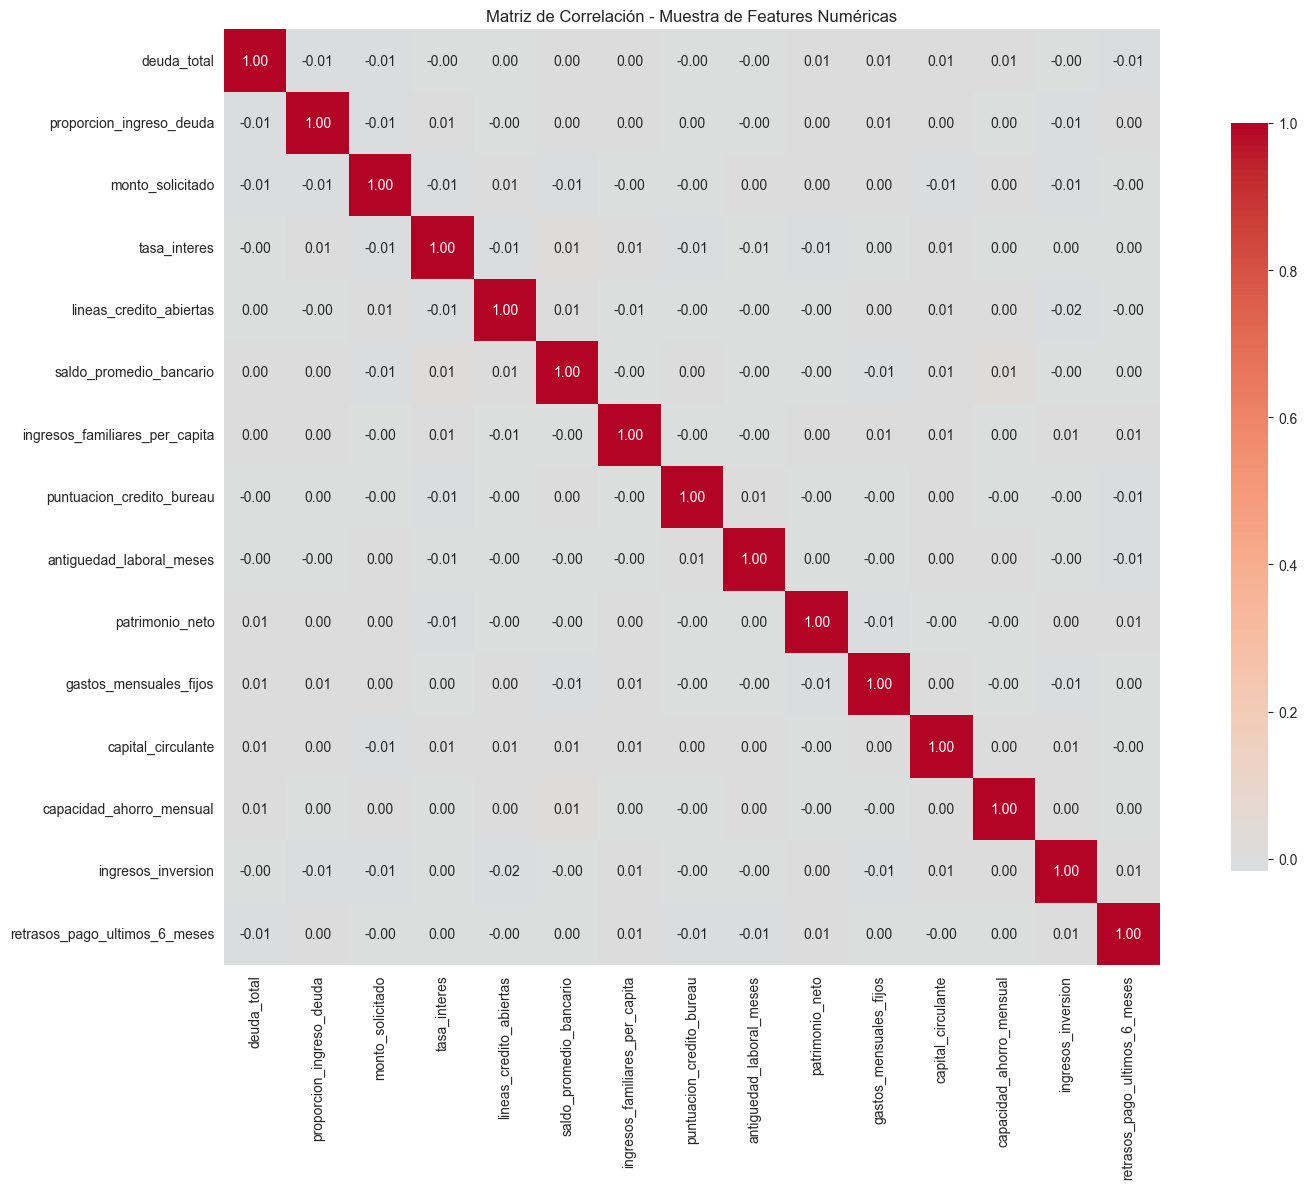

In [6]:
# Matriz de correlación
correlation_matrix = train_data[numerical_features].corr()

# Encontrar correlaciones altas entre features (>0.8)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

print("Pares de features con alta correlación (>0.8):")
for feat1, feat2, corr in high_corr_pairs:
    print(f"{feat1:30} - {feat2:30}: {corr:.3f}")

# Visualizar matriz de correlación (solo una muestra de features importantes)
plt.figure(figsize=(16, 12))
sample_features = numerical_features[:15]  # Primeras 15 features para visualización
sample_corr = train_data[sample_features].corr()

sns.heatmap(sample_corr, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Muestra de Features Numéricas')
plt.tight_layout()
plt.show()

## 6. Análisis de Features por Categoría

CATEGORÍAS DE FEATURES:

FINANCIAL (14 features):
   1. deuda_total
   2. proporcion_ingreso_deuda
   3. monto_solicitado
   4. tasa_interes
   5. lineas_credito_abiertas
   6. saldo_promedio_bancario
   7. ingresos_familiares_per_capita
   8. puntuacion_credito_bureau
   9. antiguedad_laboral_meses
  10. patrimonio_neto
  11. gastos_mensuales_fijos
  12. capital_circulante
  13. capacidad_ahorro_mensual
  14. ingresos_inversion

PAYMENT_HISTORY (10 features):
   1. retrasos_pago_ultimos_6_meses
   2. mora_historica_dias
   3. porcentaje_utilizacion_credito
   4. pagos_puntuales_ultimos_12_meses
   5. deudas_canceladas_historicas
   6. maximo_retraso_pago_dias
   7. numero_cuentas_cerradas
   8. proporcion_pagos_a_tiempo
   9. consultas_credito_recientes
  10. cambios_en_habitos_pago

DEMOGRAPHIC (10 features):
   1. edad
   2. nivel_educativo
   3. estado_civil
   4. numero_dependientes
   5. propiedad_vivienda
   6. tipo_vivienda
   7. residencia_antiguedad_meses
   8. sector_laboral

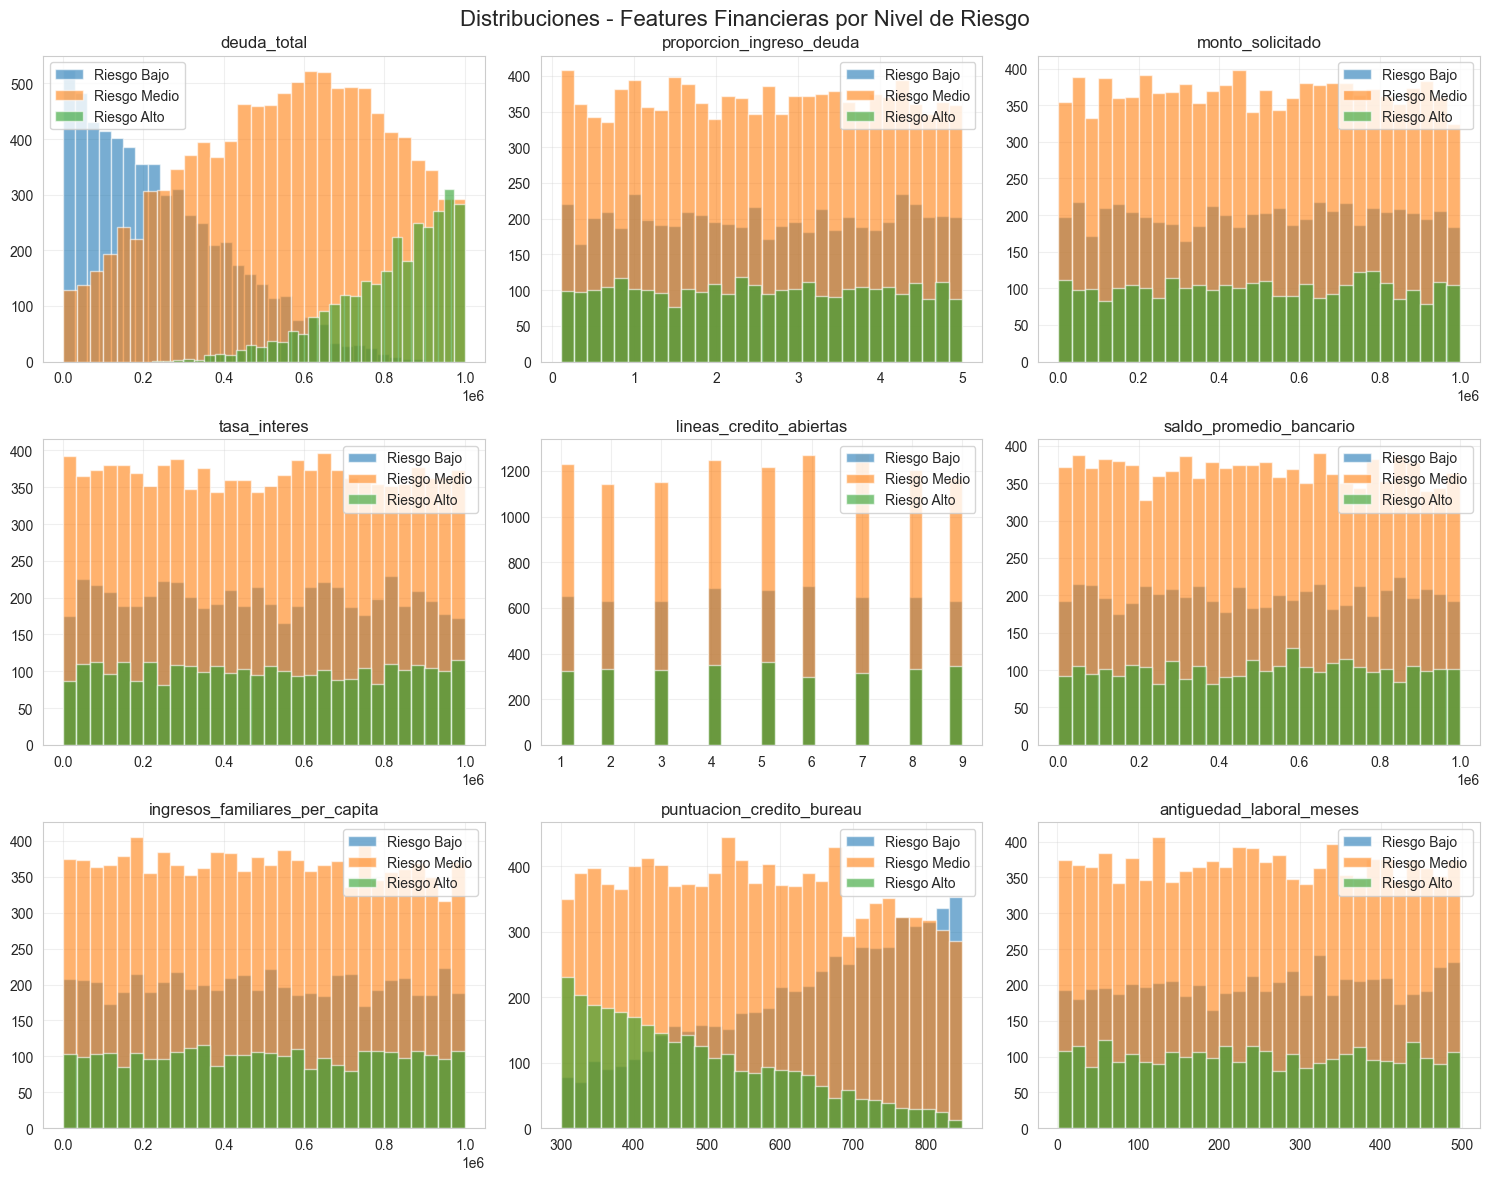

In [7]:
# Obtener información de features por categoría
feature_info = get_feature_info()

print("CATEGORÍAS DE FEATURES:")
print("="*50)

for category, features in feature_info.items():
    if category != 'target':
        print(f"\n{category.upper()} ({len(features)} features):")
        for i, feature in enumerate(features, 1):
            print(f"  {i:2d}. {feature}")

# Análisis de distribuciones por categoría de riesgo
def plot_feature_distributions(features_list, title, n_cols=3):
    n_features = len(features_list)
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes
    
    for i, feature in enumerate(features_list[:min(9, len(features_list))]):  # Máximo 9 plots
        if feature in train_data.columns:
            for risk_level in ['Bajo', 'Medio', 'Alto']:
                data_subset = train_data[train_data['nivel_riesgo'] == risk_level][feature]
                axes[i].hist(data_subset, alpha=0.6, label=f'Riesgo {risk_level}', bins=30)
            
            axes[i].set_title(f'{feature}')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
    
    # Ocultar ejes vacíos
    for i in range(len(features_list), len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualizar distribuciones de features financieras
plot_feature_distributions(feature_info['financial'][:9], "Distribuciones - Features Financieras por Nivel de Riesgo")

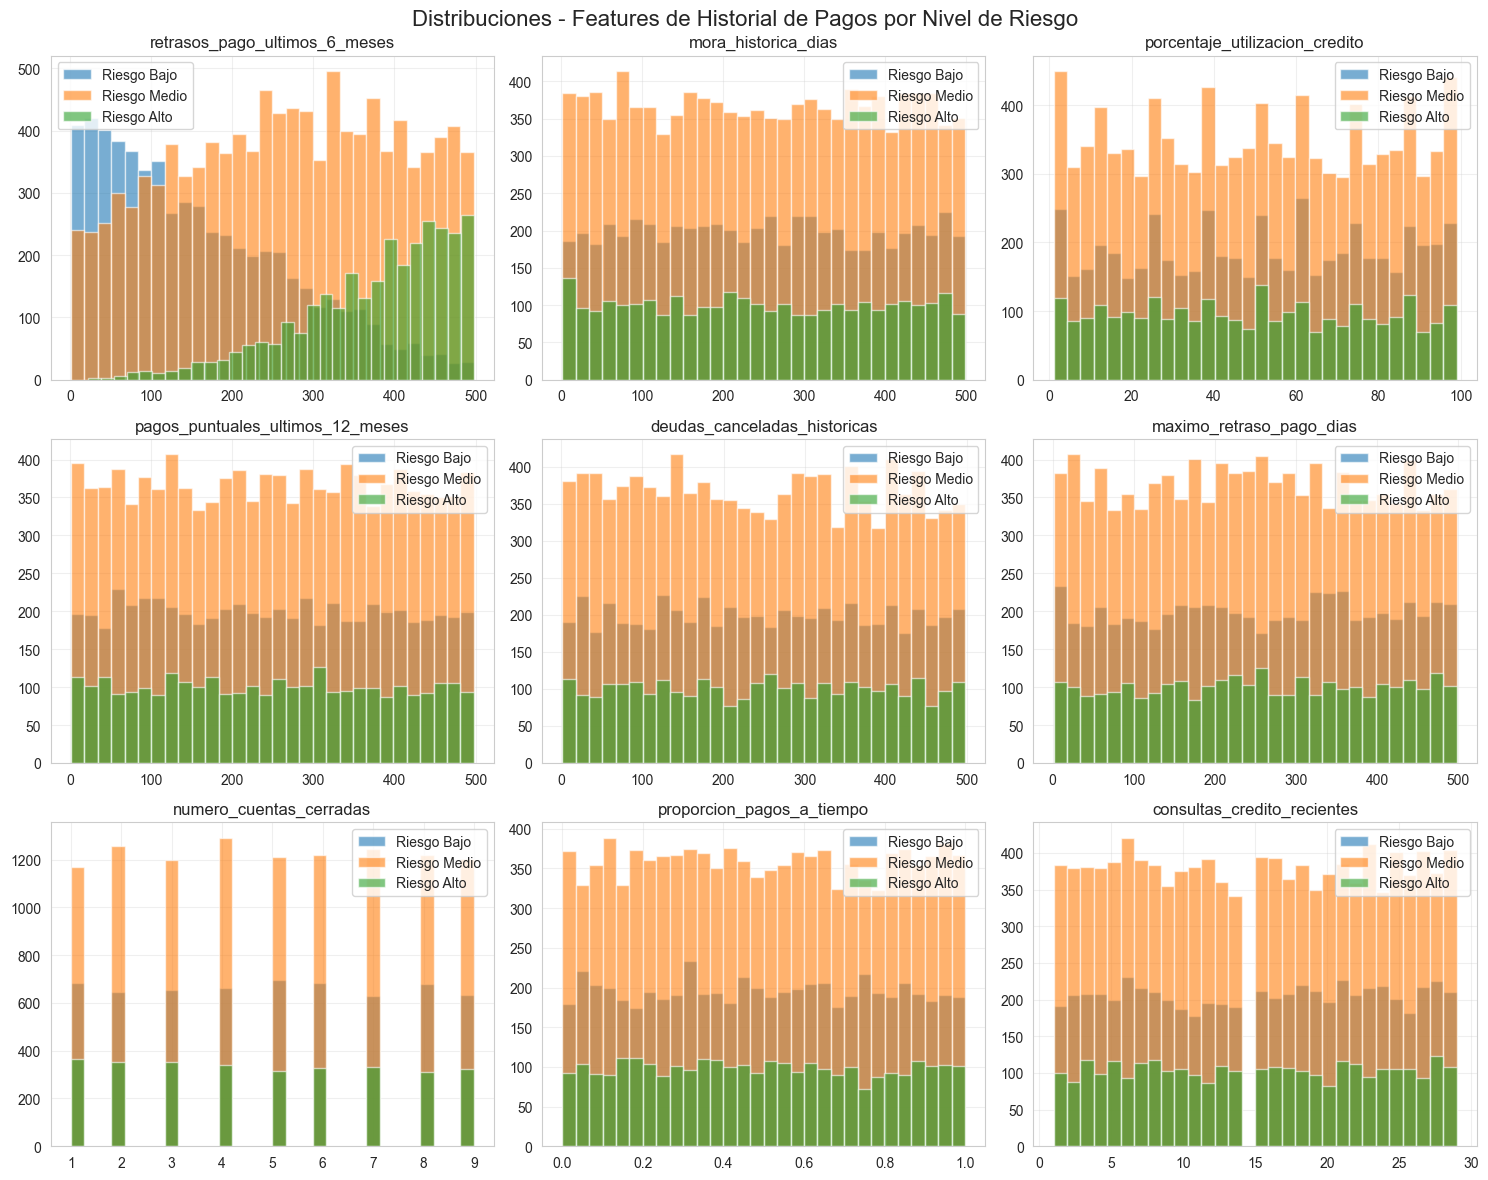

In [8]:
# Visualizar distribuciones de features de historial de pagos
plot_feature_distributions(feature_info['payment_history'][:9], "Distribuciones - Features de Historial de Pagos por Nivel de Riesgo")

## 7. Análisis de Outliers

ANÁLISIS DE OUTLIERS (Método IQR):

deuda_total:
  Outliers: 0 (0.00%)
  Límites: [-497658.63, 1499439.81]

monto_solicitado:
  Outliers: 0 (0.00%)
  Límites: [-494573.17, 1494157.97]

patrimonio_neto:
  Outliers: 0 (0.00%)
  Límites: [-495730.63, 1493047.62]

puntuacion_credito_bureau:
  Outliers: 0 (0.00%)
  Límites: [26.13, 1123.20]

tasa_interes:
  Outliers: 0 (0.00%)
  Límites: [-502533.54, 1495506.21]


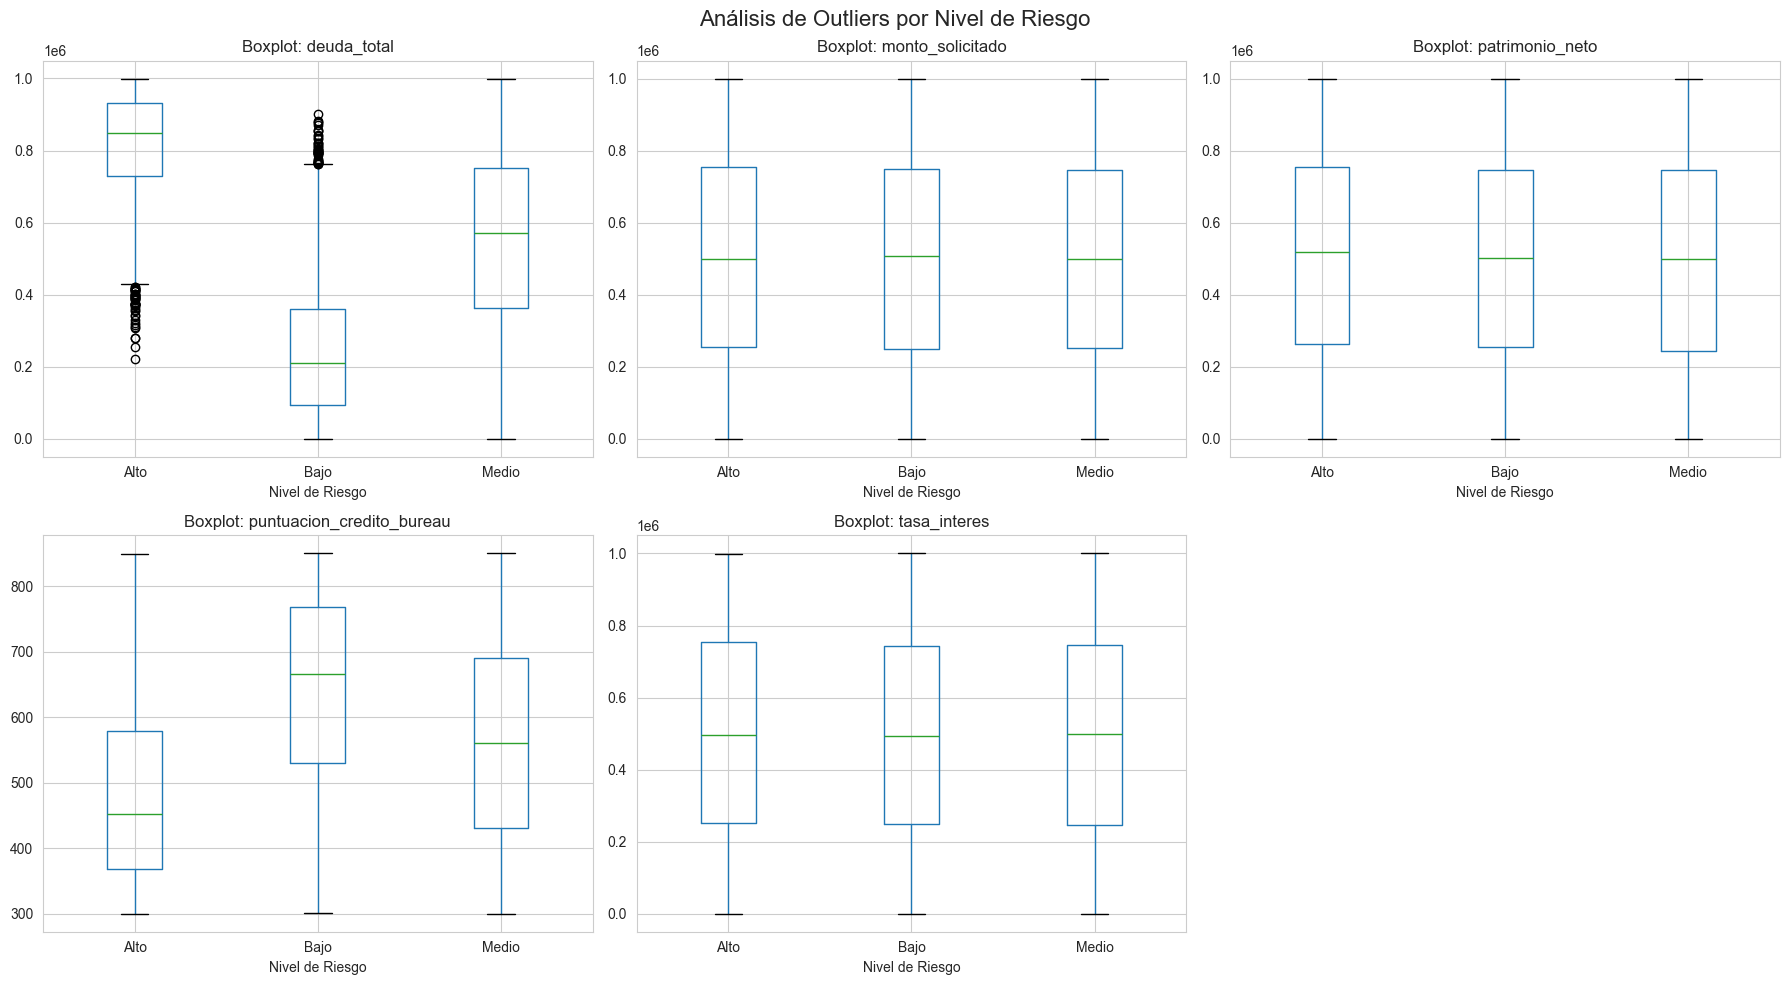

In [9]:
# Detectar outliers usando el método IQR
from data.loader import detect_outliers_iqr

# Analizar outliers en features seleccionadas
selected_features_outliers = ['deuda_total', 'monto_solicitado', 'patrimonio_neto', 
                             'puntuacion_credito_bureau', 'tasa_interes']

print("ANÁLISIS DE OUTLIERS (Método IQR):")
print("="*50)

outlier_summary = {}
for feature in selected_features_outliers:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(train_data, feature)
    outlier_percentage = (len(outliers) / len(train_data)) * 100
    
    outlier_summary[feature] = {
        'count': len(outliers),
        'percentage': outlier_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"\n{feature}:")
    print(f"  Outliers: {len(outliers):,} ({outlier_percentage:.2f}%)")
    print(f"  Límites: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Visualización de outliers con boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(selected_features_outliers):
    train_data.boxplot(column=feature, by='nivel_riesgo', ax=axes[i])
    axes[i].set_title(f'Boxplot: {feature}')
    axes[i].set_xlabel('Nivel de Riesgo')

# Ocultar el último subplot si no se usa
axes[-1].set_visible(False)

plt.suptitle('Análisis de Outliers por Nivel de Riesgo', fontsize=16)
plt.tight_layout()
plt.show()

## 8. Conclusiones del EDA y Próximos Pasos

### Hallazgos Principales:

1. **Distribución de Clases:** 
   - Verificar si hay desbalance significativo entre las clases
   - Considerar estrategias de balanceo si es necesario

2. **Calidad de Datos:**
   - Verificar presencia de valores faltantes
   - Identificar features con alta variabilidad

3. **Correlaciones:**
   - Identificar features altamente correlacionadas para posible eliminación
   - Detectar relaciones importantes con la variable objetivo

4. **Outliers:**
   - Evaluar impacto de outliers en el rendimiento del modelo
   - Decidir estrategia de tratamiento (eliminación vs transformación)

### Próximos Pasos:

1. **Preprocesamiento:**
   - Normalización/estandarización de features numéricas
   - Codificación de variables categóricas
   - Tratamiento de outliers

2. **Feature Engineering:**
   - Creación de nuevas features
   - Selección de features más relevantes
   - Aplicación de PCA si es necesario

3. **Modelado:**
   - Implementación de algoritmos desde cero
   - Validación cruzada
   - Optimización de hiperparámetros

4. **Evaluación:**
   - Métricas específicas para clasificación multiclase
   - Análisis de matriz de confusión
   - Consideración de costos de clasificación errónea